In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
df = pd.read_csv('Amreli NRM data for model building2.csv')

df = df[df['Heat number (life number)']>1]    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)

In [3]:
df['Efficiency (MT/KWH)'] = df['Efficiency (MT/KWH)']*1000
df['Previous Output'] = df['Previous Output']*1000
df['Previous Input'] = df['Previous Input']*1000
df['Scrap (MT)'] = df['Scrap (MT)']*1000
df['Sponge (MT)'] = df['Sponge (MT)']*1000
df['Alloys (MT)'] = df['Alloys (MT)']*1000

In [4]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)','Refractory lining before heating',
                 'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
output_columns = ['Efficiency (MT/KWH)']

X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

scaler1 = MinMaxScaler()
normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [5]:
## Keras NN
## model = Sequential()
n_input = X_train.shape[1] # number of features
n_hidden_1 = 500
n_hidden_2 = 100
n_hidden_3 = 50
n_hidden_4 = 150
n_hidden_5 = 100
n_hidden_6 = 50
n_hidden_7 = 25
num_digits = 1
n_output = 1

Inp = Input(shape=(n_input,))
x = Dense(n_hidden_1, activation='relu')(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
# x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
# x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
# x = Dense(n_hidden_6, activation='relu', name = "Hidden_Layer_6")(x)
# x = Dense(n_hidden_7, activation='relu', name = "Hidden_Layer_7")(x)

output = Dense(num_digits, activation='linear', name = "Output_Layer")(x)
    
model = Model(Inp, output)
model.summary() 
learning_rate = 0.001
training_epochs = 500
batch_size = 5
sgd = optimizers.SGD(lr=learning_rate)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer='adam',
                  metrics=['mse'])
    
history = model.fit(normalized_X_train, normalized_y_train,
                         batch_size = batch_size,
                         epochs = training_epochs,
                         verbose = 2)


pred_train = model.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = model.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               6500      
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               50100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 50)                5050      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 51        
Total params: 61,701
Trainable params: 61,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
 - 1s - loss: 0.0068 - mse: 0.0068
Epoch 2/500
 - 0s - loss: 0.0044 - mse: 0.0044
Epoch 3/500
 - 0s - loss: 0

Epoch 150/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 151/500
 - 0s - loss: 0.0035 - mse: 0.0035
Epoch 152/500
 - 0s - loss: 0.0029 - mse: 0.0029
Epoch 153/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 154/500
 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 155/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 156/500
 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 157/500
 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 158/500
 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 159/500
 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 160/500
 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 161/500
 - 0s - loss: 0.0024 - mse: 0.0024
Epoch 162/500
 - 0s - loss: 0.0023 - mse: 0.0023
Epoch 163/500
 - 0s - loss: 0.0025 - mse: 0.0025
Epoch 164/500
 - 0s - loss: 0.0023 - mse: 0.0023
Epoch 165/500
 - 0s - loss: 0.0023 - mse: 0.0023
Epoch 166/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 167/500
 - 0s - loss: 0.0024 - mse: 0.0024
Epoch 168/500
 - 0s - loss: 0.0022 - mse: 0.0022
Epoch 169/500
 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 170/500
 - 0s 

 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 318/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 319/500
 - 1s - loss: 0.0020 - mse: 0.0020
Epoch 320/500
 - 0s - loss: 0.0029 - mse: 0.0029
Epoch 321/500
 - 0s - loss: 0.0025 - mse: 0.0025
Epoch 322/500
 - 0s - loss: 0.0022 - mse: 0.0022
Epoch 323/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 324/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 325/500
 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 326/500
 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 327/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 328/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 329/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 330/500
 - 0s - loss: 0.0013 - mse: 0.0013
Epoch 331/500
 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 332/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 333/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 334/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 335/500
 - 0s - loss: 0.0013 - mse: 0.0013
Epoch 336/500
 - 0s - loss: 0.0013 - mse: 0.0013
Epoch 337/500
 - 0s - loss: 0.0018

Epoch 483/500
 - 0s - loss: 7.2687e-04 - mse: 7.2687e-04
Epoch 484/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 485/500
 - 0s - loss: 0.0023 - mse: 0.0023
Epoch 486/500
 - 0s - loss: 8.7517e-04 - mse: 8.7517e-04
Epoch 487/500
 - 0s - loss: 5.8864e-04 - mse: 5.8864e-04
Epoch 488/500
 - 0s - loss: 6.9020e-04 - mse: 6.9020e-04
Epoch 489/500
 - 0s - loss: 0.0010 - mse: 0.0010
Epoch 490/500
 - 0s - loss: 9.7238e-04 - mse: 9.7238e-04
Epoch 491/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 492/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 493/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 494/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 495/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 496/500
 - 0s - loss: 5.4975e-04 - mse: 5.4975e-04
Epoch 497/500
 - 0s - loss: 6.7671e-04 - mse: 6.7671e-04
Epoch 498/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 499/500
 - 0s - loss: 0.0024 - mse: 0.0024
Epoch 500/500
 - 0s - loss: 0.0018 - mse: 0.0018


In [6]:
for i in range(num_digits):
    print(output_columns[i])
    print("Train score is {}".format(mean_squared_error(y_train[:,i], y_pred_train[:,i])))
    print("Test score is {}".format(mean_squared_error(y_test[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_train[:,i]))/np.sum(np.square(y_train[:,i]-np.mean(y_train[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))

Efficiency (MT/KWH)
Train score is 0.014188550394955151
Test score is 0.010202321488748667
R2 score is -1.4870031319769068
Train NMSE score is 49.908392770640624
Test NMSE score is 248.7003131976907


In [7]:
y_pred_train = y_pred_train.reshape(318,)
y_pred_test = y_pred_test.reshape(122,)
y = np.concatenate((y_pred_train, y_pred_test),axis=0)
df['Predicted Efficiency'] = y

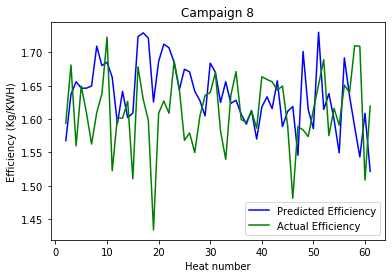

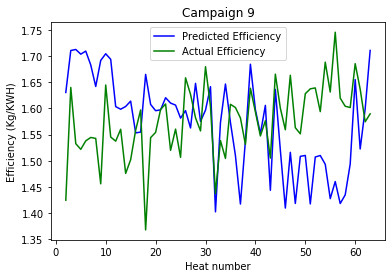

In [8]:
camp = [8,9]

for c in camp:
    dfc = df[df['campaign']==c]
    dfc = dfc.reset_index(drop=True)
    plt.plot(dfc['Heat number (life number)'],dfc['Predicted Efficiency'],c='b');
    plt.plot(dfc['Heat number (life number)'],dfc['Efficiency (MT/KWH)'],c='g');
    plt.xlabel('Heat number');
    plt.ylabel('Efficiency (Kg/KWH)');
    plt.title('Campaign {}'.format(c));
    plt.legend(['Predicted Efficiency','Actual Efficiency']);
    plt.show();

In [9]:
from scipy.optimize import minimize, LinearConstraint
dfc = df[df['campaign']==8]
dfc = dfc.reset_index(drop=True)
R = np.array(dfc['Refractory lining before heating'])
bounds = [(2,R[n-1]) for n in range(1,len(R))]
bounds = [(2,6)] + bounds

In [10]:
def objective_function(R):
    dfc['Refractory lining before heating'] = R
    input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)','Refractory lining before heating',
             'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
    output_columns = ['Efficiency (MT/KWH)']
    X = dfc[input_columns]
    X_test = X.iloc[:,:].values
    y = dfc[output_columns]
    y_test = y.iloc[:,:].values
    normalized_X_test = scaler1.transform(X_test)
    normalized_y_test = scaler2.transform(y_test)
    pred_test = model.predict(normalized_X_test)
    y_pred_test = scaler2.inverse_transform(pred_test)
    sum_of_squares = np.sum(np.square(y_test-y_pred_test))
    return sum_of_squares

In [11]:
res = minimize(objective_function, x0 = R, bounds=bounds)
res

      fun: 0.3275033176375354
 hess_inv: <60x60 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 122
      nit: 1
   status: 0
  success: True
        x: array([6.        , 6.65710384, 6.61065575, 6.56420767, 6.51775959,
       6.47131151, 6.42486343, 5.3671431 , 6.33196726, 6.28551918,
       6.2390711 , 6.19262302, 6.14617493, 6.09972685, 6.05327877,
       6.00683069, 5.96038261, 5.91393453, 5.86748644, 5.82103836,
       5.77459028, 5.7281422 , 5.68169411, 5.63524603, 5.58879795,
       5.54234987, 5.49590179, 5.4494537 , 5.40300562, 5.35655754,
       5.31010946, 5.26366138, 5.21721329, 5.17076521, 5.12431713,
       5.07786905, 5.03142097, 4